In [ ]:
#!wget http://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_train_HR.zip

In [5]:
!ls

2DSRCNN.ipynb
3DFSRCNN_56_16.ipynb
3DSRCNN_32x32.ipynb
LICENSE
README.md
SRCNN-Keras
WAZIR_SECOND_PAPER_MODEL_X4_GOOGLE_COLAB.ipynb
choosing_best_setting.ipynb
fsrcnn_56_16_relu_2.h5
history_56_16_relu_2.p
nparray_to_nii.ipynb
test_low_res.nii.gz
testing.ipynb


In [2]:
!git clone https://github.com/niazwazir/SRCNN-Keras.git

Cloning into 'SRCNN-Keras'...


In [6]:
cd SRCNN-Keras/

C:\Users\user\Desktop\ABC\3d-fsrcnn-for-mri-images\SRCNN-Keras


In [7]:
!ls

Image_Super_Resolution.ipynb
MOUNT_SRCNN_37_PSNR.ipynb
PSNR_SSIM_MSE_SRCNN_Super_Resolution_.ipynb
SRCNNMODIFIEDPYTHON2.ipynb
SRCNN_COLOR_IMAGE_GENERATED.ipynb
SRCNN_KERAS.ipynb
SRCNN_KERAS_2nd.ipynb
SRCNN_KERAS_IN_Python3.ipynb
SRCNN_KERAS_IN_Python3_Curves.ipynb
baby_GT.bmp
baby_x2_GT.png
bird_GT.bmp
butterfly_GT.bmp
head_GT.bmp
prepare_data.py
project.gif
subpixel.py
text
woman_GT.bmp
yang91


In [8]:
!unzip yang91.zip

unzip:  cannot find or open yang91.zip, yang91.zip.zip or yang91.zip.ZIP.


In [9]:
!ls

Image_Super_Resolution.ipynb
MOUNT_SRCNN_37_PSNR.ipynb
PSNR_SSIM_MSE_SRCNN_Super_Resolution_.ipynb
SRCNNMODIFIEDPYTHON2.ipynb
SRCNN_COLOR_IMAGE_GENERATED.ipynb
SRCNN_KERAS.ipynb
SRCNN_KERAS_2nd.ipynb
SRCNN_KERAS_IN_Python3.ipynb
SRCNN_KERAS_IN_Python3_Curves.ipynb
baby_GT.bmp
baby_x2_GT.png
bird_GT.bmp
butterfly_GT.bmp
head_GT.bmp
prepare_data.py
project.gif
subpixel.py
text
woman_GT.bmp
yang91


In [10]:
!rm -r *.zip

rm: cannot remove '*.zip': No such file or directory


In [11]:
!ls

Image_Super_Resolution.ipynb
MOUNT_SRCNN_37_PSNR.ipynb
PSNR_SSIM_MSE_SRCNN_Super_Resolution_.ipynb
SRCNNMODIFIEDPYTHON2.ipynb
SRCNN_COLOR_IMAGE_GENERATED.ipynb
SRCNN_KERAS.ipynb
SRCNN_KERAS_2nd.ipynb
SRCNN_KERAS_IN_Python3.ipynb
SRCNN_KERAS_IN_Python3_Curves.ipynb
baby_GT.bmp
baby_x2_GT.png
bird_GT.bmp
butterfly_GT.bmp
head_GT.bmp
prepare_data.py
project.gif
subpixel.py
text
woman_GT.bmp
yang91


In [12]:
cd ..

C:\Users\user\Desktop\ABC\3d-fsrcnn-for-mri-images


In [13]:
!ls

2DSRCNN.ipynb
3DFSRCNN_56_16.ipynb
3DSRCNN_32x32.ipynb
LICENSE
README.md
SRCNN-Keras
WAZIR_SECOND_PAPER_MODEL_X4_GOOGLE_COLAB.ipynb
choosing_best_setting.ipynb
fsrcnn_56_16_relu_2.h5
history_56_16_relu_2.p
nparray_to_nii.ipynb
test_low_res.nii.gz
testing.ipynb


In [14]:
#!unzip "DIV2K_train_HR.zip"

In [15]:
#!rm -r *.zip

In [16]:
#!ls

In [17]:
############### IF YOU DON'T WANT TO TRAIN :
############### Load my github model and use the output patch prediction and merging code from this same notebook lateron

In [18]:
DATADIR = "SRCNN-Keras/yang91"
DATADIR2 = "SRCNN-Keras/yang91"
#DATADIR2 = "DIV2K_train_HR"

In [19]:
import os
import numpy as np
import cv2
#from google.colab.patches import cv2_imshow

In [20]:
scale = 4
req_size = 20
inp_size = int(req_size/scale)
stride = 15

X=[]
labels=[]

for filera in os.listdir(DATADIR):
  readpath = os.path.join(DATADIR,filera)
  img = cv2.imread(readpath)
  img = np.asarray(img)
  shapes = img.shape
  for i in range(0, shapes[0]-req_size+1, stride):
    for j in range(0, shapes[1]-req_size+1,stride):
      subimage_HR = img[i:i+req_size, j:j+req_size]
      #cv2_imshow(subimage_HR)
      subimage_LR = cv2.resize(subimage_HR,(inp_size,inp_size))
      X.append(subimage_LR)
      labels.append(subimage_HR)

counta=0
for filera in os.listdir(DATADIR2):
  counta=counta+1
  if(counta==300):
    break
  readpath = os.path.join(DATADIR2,filera)
  img = cv2.imread(readpath)
  img = np.asarray(img)
  shapes = img.shape
  for i in range(0, shapes[0]-req_size+1, stride):
    for j in range(0, shapes[1]-req_size+1,stride):
      subimage_HR = img[i:i+req_size, j:j+req_size]
      #cv2_imshow(subimage_HR)
      subimage_LR = cv2.resize(subimage_HR,(inp_size,inp_size))
      X.append(subimage_LR)
      labels.append(subimage_HR)

In [21]:
X = np.asarray(X)
labels = np.asarray(labels)
print(labels.shape)
print(X.shape)

(37698, 20, 20, 3)
(37698, 5, 5, 3)


In [22]:
import tensorflow as tf
import keras
import numpy as np
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Conv2D, SeparableConv2D, Input,Conv2DTranspose, Activation
from tensorflow.keras.layers import LeakyReLU
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam, SGD
from tensorflow.keras.layers import LeakyReLU
from keras.layers.advanced_activations import PReLU

Using TensorFlow backend.


In [23]:
alpha = 0.85
def basic_mse(y_true, y_pred):
  pred = tf.image.sobel_edges(y_pred)
  true = tf.image.sobel_edges(y_true)
  lossmse = tf.reduce_mean(tf.square(y_pred-y_true))
  lossedge = tf.reduce_mean(tf.square(pred-true))
  return alpha*lossmse + (1-alpha)*lossedge

In [24]:
inputlayer = tf.keras.layers.Input(shape=(None,None,3))

In [25]:
def RESNET_BLOCK():
  inputlayer = tf.keras.layers.Input(shape=(None,None,3))
  RESNET_1 =  SeparableConv2D(3, (1,1), padding='same', activation='relu')(inputlayer)
  RESNET_2 =  SeparableConv2D(3, (3,3), padding='same', activation='relu')(RESNET_1)
  concatenateR = keras.layers.concatenate([inputlayer,RESNET_2], axis = 3)
  RESNET_3 =  SeparableConv2D(3, (5,5), padding='same', activation='relu')(concatenateR)
  concatenateR1 = keras.layers.concatenate([inputlayer,RESNET_3], axis = 3)
  RESNET_3 =  SeparableConv2D(3, (7,7), padding='same', activation='relu')(concatenateR1)
  out = Activation('relu')(RESNET_3)
  model = Model(inputs=inputlayer , outputs =out)
  return model

In [ ]:
WAZIR_RESNET_BLOCK = RESNET_BLOCK()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\user\anaconda3\envs\gputest\lib\site-packages\IPython\core\interactiveshell.py", line 3437, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-23-7d814fc0018a>", line 1, in <module>
    WAZIR_RESNET_BLOCK = RESNET_BLOCK()
  File "<ipython-input-22-a9d9b584c392>", line 5, in RESNET_BLOCK
    concatenateR = keras.layers.concatenate([inputlayer,RESNET_2], axis = 3)
  File "C:\Users\user\anaconda3\envs\gputest\lib\site-packages\keras\layers\merge.py", line 641, in concatenate
    return Concatenate(axis=axis, **kwargs)(inputs)
  File "C:\Users\user\anaconda3\envs\gputest\lib\site-packages\keras\engine\topology.py", line 606, in __call__
    previous_mask = _collect_previous_mask(inputs)
  File "C:\Users\user\anaconda3\envs\gputest\lib\site-packages\keras\engine\topology.py", line 2834, in _collect_previous_mask
    mask = node.output_masks[tensor_index]
AttributeError: 'Node' object has no attribute '

In [1]:
WAZIR_RESNET_BLOCK.summary()

NameError: name 'WAZIR_RESNET_BLOCK' is not defined

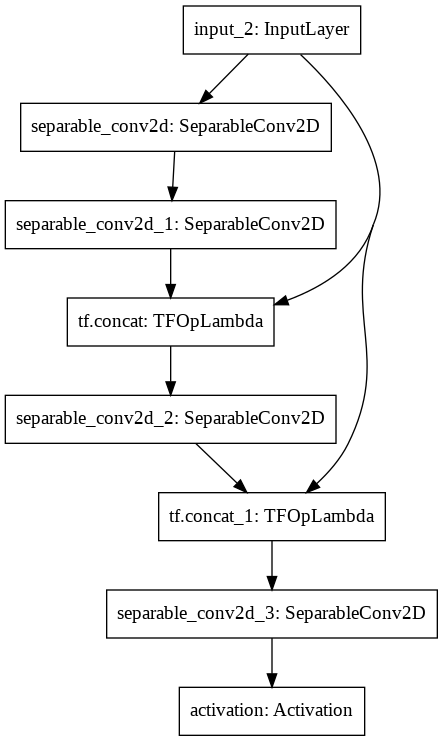

In [ ]:
tf.keras.utils.plot_model(WAZIR_RESNET_BLOCK, 'RBLOCK.png')

In [26]:
def XCEPTION_BLOCK():
    #_input = Input(shape=(None, None, 3))
    inputlayer = tf.keras.layers.Input(shape=(None,None,3))
    XCEPTION_1 =  SeparableConv2D(64, (3,3), padding='same', activation='relu')(inputlayer)
    XCEPTION_1a =  SeparableConv2D(64, (3,3), padding='same', activation='relu')(XCEPTION_1)
    XCEPTION_1b =  SeparableConv2D(64, (3,3), padding='same', activation='relu')(XCEPTION_1a)
    XCEPTION_1c =  SeparableConv2D(64, (3,3), padding='same', activation='relu')(XCEPTION_1b)
    XCEPTION_1d =  SeparableConv2D(64, (3,3), padding='same', activation='relu')(XCEPTION_1c)
    XCEPTION_2 =  SeparableConv2D(64, (5,5), padding='same', activation='relu')(inputlayer)
    XCEPTION_2a =  SeparableConv2D(64, (5,5), padding='same', activation='relu')(XCEPTION_2)
    XCEPTION_2b =  SeparableConv2D(64, (5,5), padding='same', activation='relu')(XCEPTION_2a)
    XCEPTION_2c =  SeparableConv2D(64, (5,5), padding='same', activation='relu')(XCEPTION_2b)
    XCEPTION_2d =  SeparableConv2D(64, (5,5), padding='same', activation='relu')(XCEPTION_2c)
    XCEPTION_3 =  SeparableConv2D(64, (7,7), padding='same', activation='relu')(inputlayer)
    XCEPTION_3a =  SeparableConv2D(64, (5,5), padding='same', activation='relu')(XCEPTION_3)
    XCEPTION_3b =  SeparableConv2D(64, (5,5), padding='same', activation='relu')(XCEPTION_3a)
    XCEPTION_3c =  SeparableConv2D(64, (5,5), padding='same', activation='relu')(XCEPTION_3b)
    XCEPTION_3d =  SeparableConv2D(64, (5,5), padding='same', activation='relu')(XCEPTION_3c)
    concatenateX = keras.layers.concatenate([inputlayer,XCEPTION_1d,XCEPTION_2d,XCEPTION_3d], axis = 3)
    model = Model(inputs=inputlayer , outputs =concatenateX)
    return model

In [ ]:
WAZIR_XCEPTION_BLOCK = XCEPTION_BLOCK()

In [ ]:
WAZIR_XCEPTION_BLOCK.summary()

Model: "model_34"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_36 (InputLayer)           [(None, None, None,  0                                            
__________________________________________________________________________________________________
separable_conv2d_234 (Separable (None, None, None, 6 283         input_36[0][0]                   
__________________________________________________________________________________________________
separable_conv2d_239 (Separable (None, None, None, 6 331         input_36[0][0]                   
__________________________________________________________________________________________________
separable_conv2d_244 (Separable (None, None, None, 6 403         input_36[0][0]                   
___________________________________________________________________________________________

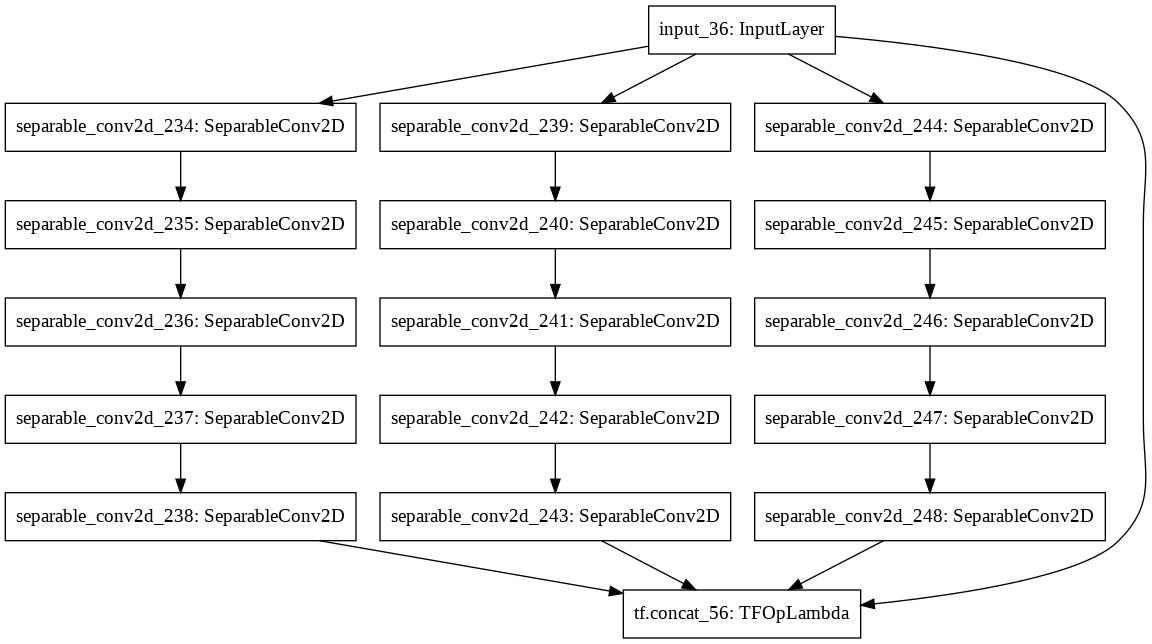

In [ ]:
tf.keras.utils.plot_model(WAZIR_XCEPTION_BLOCK, 'BLOCK.png')

In [3]:
def FIRE_BLOCK():
    #_input = Input(shape=(None, None, 3))
    inputlayer = tf.keras.layers.Input(shape=(None,None,3))
    squeezea =  SeparableConv2D(64, (1,1), padding='same', activation='relu')(inputlayer)
    squeezeb =  SeparableConv2D(64, (1,1), padding='same', activation='relu')(inputlayer)
    squeezec =  SeparableConv2D(64, (1,1), padding='same', activation='relu')(inputlayer)
    squeezed =  SeparableConv2D(64, (1,1), padding='same', activation='relu')(inputlayer)
    concatenate3 = keras.layers.concatenate([squeezea,squeezeb,squeezec,squeezed], axis = 3)
    Expand9 = SeparableConv2D(64, (1,1), padding='same', activation='relu')(concatenate3)
    Expand10 = SeparableConv2D(64, (1,1), padding='same', activation='relu')(concatenate3)
    Expand11 = SeparableConv2D(64, (1,1), padding='same', activation='relu')(concatenate3)
    Expand12 = SeparableConv2D(64, (1,1), padding='same', activation='relu')(concatenate3)
    Expand13 = SeparableConv2D(64, (3,3), padding='same', activation='relu')(concatenate3)
    Expand14 = SeparableConv2D(64, (3,3), padding='same', activation='relu')(concatenate3)
    Expand15 = SeparableConv2D(64, (3,3), padding='same', activation='relu')(concatenate3)
    Expand16 = SeparableConv2D(64, (3,3), padding='same', activation='relu')(concatenate3)
    concatenate4 = keras.layers.concatenate([Expand9,Expand10,Expand11,Expand12,Expand13,Expand14,Expand15,Expand16], axis = 3)
    model = Model(inputs=inputlayer , outputs =concatenate4)
    return model


In [ ]:
WAZIR_FIRE_BLOCK = FIRE_BLOCK()

In [ ]:
WAZIR_FIRE_BLOCK.summary()

Model: "model_35"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_37 (InputLayer)           [(None, None, None,  0                                            
__________________________________________________________________________________________________
separable_conv2d_249 (Separable (None, None, None, 6 259         input_37[0][0]                   
__________________________________________________________________________________________________
separable_conv2d_250 (Separable (None, None, None, 6 259         input_37[0][0]                   
__________________________________________________________________________________________________
separable_conv2d_251 (Separable (None, None, None, 6 259         input_37[0][0]                   
___________________________________________________________________________________________

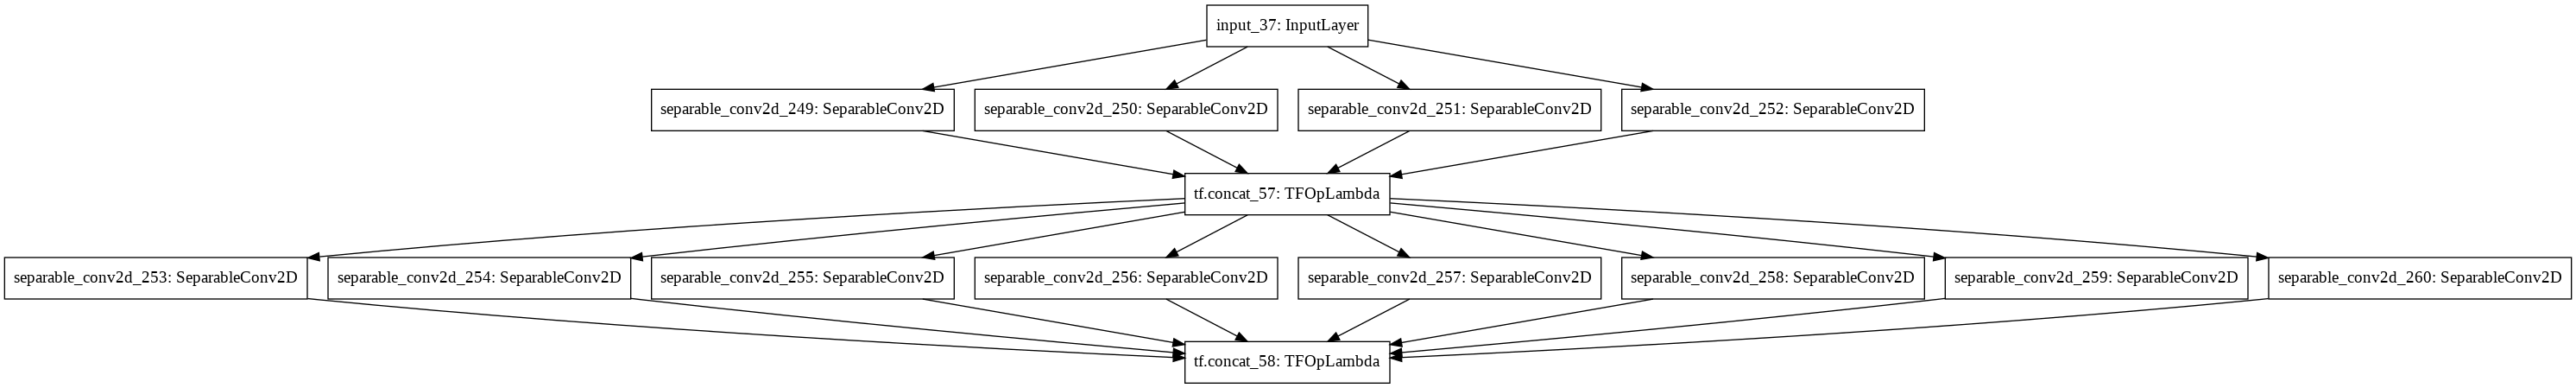

In [ ]:
tf.keras.utils.plot_model(WAZIR_FIRE_BLOCK, 'BLOCK.png')

In [ ]:
inputlayer = tf.keras.layers.Input(shape=(None,None,3))
#FIRE_BLOCK_CHANNEL
FIRE_1 =  FIRE_BLOCK()(inputlayer)
C1 =  SeparableConv2D(3, (3,3), padding='same', activation='relu')(FIRE_1)
FIRE_2 =  FIRE_BLOCK()(C1)
C2 =  SeparableConv2D(3, (3,3), padding='same', activation='relu')(FIRE_2)
FIRE_3 =  FIRE_BLOCK()(C2)
C3 =  SeparableConv2D(3, (3,3), padding='same', activation='relu')(FIRE_3)
FIRE_4 =  FIRE_BLOCK()(C3)
C4 =  SeparableConv2D(3, (3,3), padding='same', activation='relu')(FIRE_4)
FIRE_5 =  FIRE_BLOCK()(C4)
C5 =  SeparableConv2D(3, (3,3), padding='same', activation='relu')(FIRE_5)
FIRE_6 =  FIRE_BLOCK()(C5)
CF6 =  SeparableConv2D(3, (3,3), padding='same', activation='relu')(FIRE_6)
FIRE_7 =  FIRE_BLOCK()(CF6)
CF7 =  SeparableConv2D(3, (3,3), padding='same', activation='relu')(FIRE_7)
FIRE_8 =  FIRE_BLOCK()(CF7)
CF8 =  SeparableConv2D(3, (3,3), padding='same', activation='relu')(FIRE_8)
FIRE_9 =  FIRE_BLOCK()(CF8)
CF9 =  SeparableConv2D(3, (3,3), padding='same', activation='relu')(FIRE_9)
FIRE_10 =  FIRE_BLOCK()(CF9)
CF10 =  SeparableConv2D(3, (3,3), padding='same', activation='relu')(FIRE_10)

#XCEPTION_BLOCK_CHANNEL
XCEPTION_B1 =  XCEPTION_BLOCK()(inputlayer)
C6 =  SeparableConv2D(3, (3,3), padding='same', activation='relu')(XCEPTION_B1)
XCEPTION_B2 =  XCEPTION_BLOCK()(C6)
C7 =  SeparableConv2D(3, (3,3), padding='same', activation='relu')(XCEPTION_B2)
XCEPTION_B3 =  XCEPTION_BLOCK()(C7)
C8 =  SeparableConv2D(3, (3,3), padding='same', activation='relu')(XCEPTION_B3)
XCEPTION_B4 =  XCEPTION_BLOCK()(C8)
C9 =  SeparableConv2D(3, (3,3), padding='same', activation='relu')(XCEPTION_B4)
XCEPTION_B5 =  XCEPTION_BLOCK()(C9)
C10 =  SeparableConv2D(3, (3,3), padding='same', activation='relu')(XCEPTION_B5)
XCEPTION_B6 =  XCEPTION_BLOCK()(C10)
XC6 =  SeparableConv2D(3, (3,3), padding='same', activation='relu')(XCEPTION_B6)
XCEPTION_B7 =  XCEPTION_BLOCK()(XC6)
XC7 =  SeparableConv2D(3, (3,3), padding='same', activation='relu')(XCEPTION_B7)
XCEPTION_B8 =  XCEPTION_BLOCK()(XC7)
XC8 =  SeparableConv2D(3, (3,3), padding='same', activation='relu')(XCEPTION_B8)
XCEPTION_B9 =  XCEPTION_BLOCK()(XC8)
XC9 =  SeparableConv2D(3, (3,3), padding='same', activation='relu')(XCEPTION_B9)
XCEPTION_B10 =  XCEPTION_BLOCK()(XC9)
XC10 =  SeparableConv2D(3, (3,3), padding='same', activation='relu')(XCEPTION_B10)
#RESNET_BLOCK_CHANNEL
RESNET_B1 =  RESNET_BLOCK()(inputlayer)
C11 =  SeparableConv2D(3, (3,3), padding='same', activation='relu',name='CONV_11')(RESNET_B1)
RESNET_B2 =  RESNET_BLOCK()(C11)
C12 =  SeparableConv2D(3, (3,3), padding='same', activation='relu',name='CONV_12')(RESNET_B2)
RESNET_B3 =  RESNET_BLOCK()(C12)
C13 =  SeparableConv2D(3, (3,3), padding='same', activation='relu',name='CONV_13')(RESNET_B3)
RESNET_B4 =  RESNET_BLOCK()(C13)
C14 =  SeparableConv2D(3, (3,3), padding='same', activation='relu',name='CONV_14')(RESNET_B4)
RESNET_B5 =  RESNET_BLOCK()(C14)
C15 =  SeparableConv2D(3, (3,3), padding='same', activation='relu',name='CONV_15')(RESNET_B5)
RESNET_B6 =  RESNET_BLOCK()(C15)
CR15 =  SeparableConv2D(3, (3,3), padding='same', activation='relu')(RESNET_B6)
RESNET_B7 =  RESNET_BLOCK()(CR15)
CR16 =  SeparableConv2D(3, (3,3), padding='same', activation='relu')(RESNET_B7)
RESNET_B8 =  RESNET_BLOCK()(CR16)
CR17 =  SeparableConv2D(3, (3,3), padding='same', activation='relu')(RESNET_B8)
RESNET_B9 =  RESNET_BLOCK()(CR17)
CR18 =  SeparableConv2D(3, (3,3), padding='same', activation='relu')(RESNET_B9)
RESNET_B10 =  RESNET_BLOCK()(CR18)
CR18 =  SeparableConv2D(3, (3,3), padding='same', activation='relu')(RESNET_B10)

concatenate1 = keras.layers.concatenate([CF10,CR18], axis = 3)
C16 = Conv2D(3, (1,1),padding="same",name='CONV10')(CF10)
A10 = LeakyReLU(alpha=0.2)(C16)
y = Conv2DTranspose(3, (16,16), strides = (scale,scale), padding="same",activation=None,name='UPSCALING')(A10)
model = Model(inputs=inputlayer , outputs = y)
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\user\anaconda3\envs\gputest\lib\site-packages\IPython\core\interactiveshell.py", line 3437, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-27-cc093a1e1f12>", line 3, in <module>
    FIRE_1 =  FIRE_BLOCK()(inputlayer)
  File "<ipython-input-3-4cda36589483>", line 8, in FIRE_BLOCK
    concatenate3 = keras.layers.concatenate([squeezea,squeezeb,squeezec,squeezed], axis = 3)
  File "C:\Users\user\anaconda3\envs\gputest\lib\site-packages\keras\layers\merge.py", line 641, in concatenate
    return Concatenate(axis=axis, **kwargs)(inputs)
  File "C:\Users\user\anaconda3\envs\gputest\lib\site-packages\keras\engine\topology.py", line 606, in __call__
    previous_mask = _collect_previous_mask(inputs)
  File "C:\Users\user\anaconda3\envs\gputest\lib\site-packages\keras\engine\topology.py", line 2834, in _collect_previous_mask
    mask = node.output_masks[tensor_index]
AttributeError: 'Node' object has no

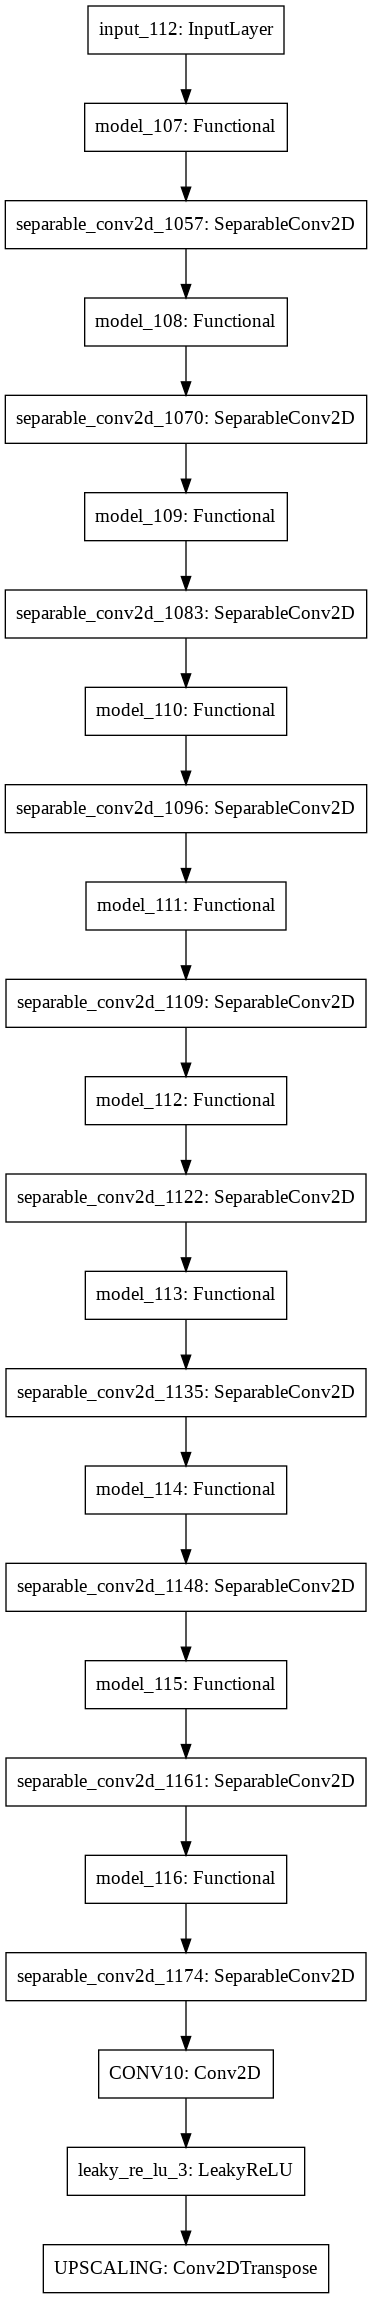

In [ ]:
tf.keras.utils.plot_model(model, 'my_first_model.png')

In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam, SGD

In [ ]:
model.compile(loss='mse',
              optimizer='adam',
              metrics=["accuracy"])

In [ ]:
checkpoint = ModelCheckpoint('best_model_improved.h5',  # model filename
                             monitor='val_loss', # quantity to monitor
                             verbose=0, # verbosity - 0 or 1
                             save_best_only= True, # The latest best model will not be overwritten
                             mode='auto') # The decision to overwrite model is made 
                                          # automatically depending on the quantity to monitor

In [ ]:
history = model.fit(X,labels,batch_size=32,shuffle=True,validation_split=0.01 ,epochs=2,callbacks=[checkpoint],
                    verbose=1 )

Epoch 1/2
1167/1167 [==============================] - 63s 47ms/step - loss: 6336.3330 - accuracy: 0.6672 - val_loss: 4227.2368 - val_accuracy: 0.4056
Epoch 2/2
1167/1167 [==============================] - 54s 47ms/step - loss: 4949.8589 - accuracy: 0.6873 - val_loss: 4164.9800 - val_accuracy: 0.4056


In [ ]:
import matplotlib.pyplot as plt

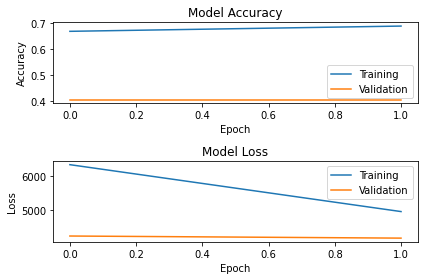

In [ ]:
plt.figure(1)

# summarize history for accuracy

plt.subplot(211)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')

# summarize history for loss

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.tight_layout()

plt.show()

In [ ]:
#from tensorflow.keras.models import load_model
from keras.models import load_model

In [ ]:
predict = tf.keras.models.load_model("best_model_improved.h5")

In [ ]:
def psnr_calc():
    testimg = []
    GT = cv2.imread("SRCNN-Keras/baby_x2_GT.png")
    GT = np.asarray(GT)
    h = GT.shape[0]
    l = GT.shape[1]
    #print(GT.shape)
    img1 = cv2.resize(GT,(int(l/4),int(h/4)),interpolation = cv2.INTER_CUBIC) ##################################
    img1 = np.asarray(img1)
    testimg.append(img1)
    testimg = np.asarray(testimg)
    print(testimg.shape)
    fin =(model.predict(testimg)[0])
    inp = cv2.resize(img1,(l,h),interpolation = cv2.INTER_CUBIC)
    GT = GT[0:fin.shape[0],0:fin.shape[1],:]
    #mse = np.square(np.subtract(GT,inp)).mean()
    mse = np.square(np.subtract(GT, fin)).mean()
    cv2_imshow(fin)
    cv2_imshow(inp)
    cv2_imshow(GT)
    import math
    psnr = 20*math.log(255.0,10) - 10*(math.log(mse,10))
    return psnr

(1, 128, 128, 3)


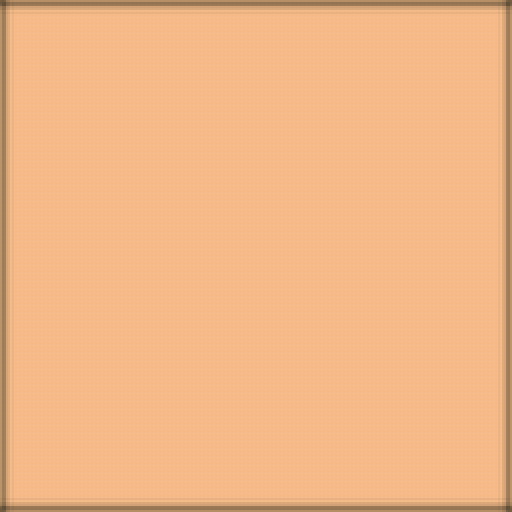

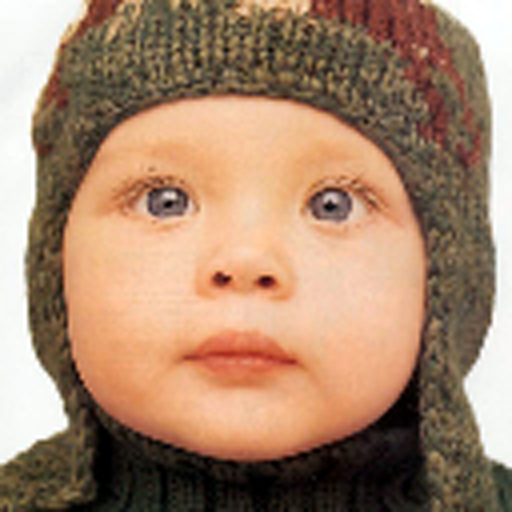

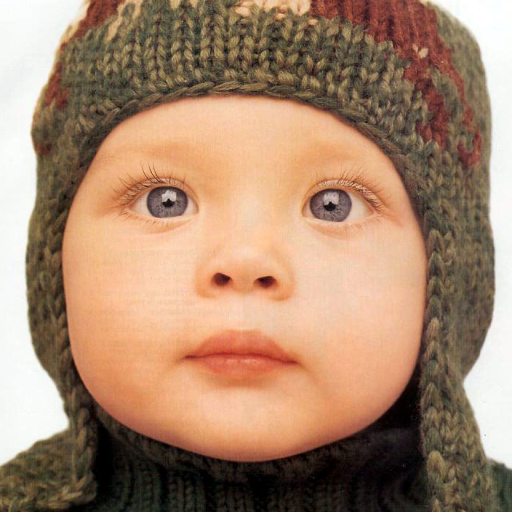

8.802230300923888


In [ ]:
ps1 = psnr_calc()
print(ps1)

In [ ]:
#28.39428565390642